In [1]:
import pandas as pd 
import numpy as np
import os, os.path, json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math 
import plotly.graph_objects as go

In [2]:
def all_rec_pfs(participant_logbook, participant_ID, recording_location ):
    # create data frame with acc_recs and rec_pf to get data form summary 
    accs = ['acc_rec_initial', ]
    acc_rec_fps = pd.DataFrame(columns=['rec_id', 'rec_fp'])
    for acc in accs: 
        for folder in participant_logbook.loc[acc, participant_ID].split(','):
            new_rec_fp = os.path.join(recording_location, participant_logbook.loc['date', participant_ID]) + folder.strip()
            new_rec = {'rec_id': acc, 'rec_fp': new_rec_fp}
            acc_rec_fps = acc_rec_fps.append(new_rec, ignore_index=True)
    return acc_rec_fps


In [3]:
def mean_ecr_pos_outlier_removed(pos_data, threshold=5):
    mean = np.nanmean(pos_data)
    pos_data[pos_data>mean+threshold] = np.nan
    pos_data[pos_data<mean-threshold] = np.nan
    pos_mean = np.nanmean(pos_data)
    return pos_mean
    

In [4]:
participant_logbook = pd.read_excel(r'C:\Users\p.wagner\Documents\experiment_execution_logV.2.xlsx', index_col=0 )
recordings_location = r'E:\PupilLabsRecordings'

df_cer = pd.DataFrame(columns=['OD_x', 'OD_y', 'OD_z',
                                        'OS_x', 'OS_y', 'OS_z',
                                        'cceye_x', 'cceye_y', 'cceye_z',])

px_IDs  = [2, 3, 5, 6, 7, 9, 10, 11, 12, 14,]
for px_ID in px_IDs: 
    acc_rec_fps = all_rec_pfs(participant_logbook, px_ID, recordings_location)
    df_cer = df_cer.append(acc_rec_fps, ignore_index=True, sort=False)


In [5]:
df_cer.rec_fp

0    E:\PupilLabsRecordings\2020_03_31\001
1    E:\PupilLabsRecordings\2020_04_01\002
2    E:\PupilLabsRecordings\2020_04_03\001
3    E:\PupilLabsRecordings\2020_04_04\001
4    E:\PupilLabsRecordings\2020_04_06\001
5    E:\PupilLabsRecordings\2020_04_09\001
6    E:\PupilLabsRecordings\2020_04_10\001
7    E:\PupilLabsRecordings\2020_04_11\003
8    E:\PupilLabsRecordings\2020_06_04\005
9    E:\PupilLabsRecordings\2020_06_11\002
Name: rec_fp, dtype: object

In [6]:
for idx in df_cer.index:
    gaze_data_fn = os.path.join(df_cer.loc[idx,'rec_fp'], r'exports\000\gaze_positions.csv')
    gaze_data = pd.read_csv(gaze_data_fn)

    df_cer.loc[idx, 'OD_x'] = mean_ecr_pos_outlier_removed(gaze_data.loc[:,'eye_center0_3d_x'].copy())
    df_cer.loc[idx, 'OD_y'] = mean_ecr_pos_outlier_removed(gaze_data.loc[:,'eye_center0_3d_y'].copy())
    df_cer.loc[idx, 'OD_z'] = mean_ecr_pos_outlier_removed(gaze_data.loc[:,'eye_center0_3d_z'].copy())
    df_cer.loc[idx, 'OS_x'] = mean_ecr_pos_outlier_removed(gaze_data.loc[:,'eye_center1_3d_x'].copy())
    df_cer.loc[idx, 'OS_y'] = mean_ecr_pos_outlier_removed(gaze_data.loc[:,'eye_center1_3d_y'].copy())
    df_cer.loc[idx, 'OS_z'] = mean_ecr_pos_outlier_removed(gaze_data.loc[:,'eye_center1_3d_z'].copy())

    df_cer.loc[idx, 'cceye_x'] = (df_cer.loc[idx, 'OS_x'] + df_cer.loc[idx, 'OD_x'])/2
    df_cer.loc[idx, 'cceye_y'] = (df_cer.loc[idx, 'OS_y'] + df_cer.loc[idx, 'OD_y'])/2
    df_cer.loc[idx, 'cceye_z'] = (df_cer.loc[idx, 'OS_z'] + df_cer.loc[idx, 'OD_z'])/2

In [7]:
df_cer

OD_x     OD_y     OD_z     OS_x     OS_y     OS_z  cceye_x  cceye_y  \
0  17.6306  13.9805 -21.8701 -39.6654  14.6078 -20.1396 -11.0174  14.2942   
1  16.9031   12.568 -25.2839 -37.6278  12.7083 -24.7782 -10.3624  12.6381   
2  8.89934  10.7924 -32.1849 -39.2054  14.9659 -21.4527  -15.153  12.8792   
3  24.0038  16.5128 -15.4942 -40.6931  14.1312  -19.175 -8.34462   15.322   
4   15.159  8.95578 -30.3662 -40.2493  13.2705 -20.6855 -12.5451  11.1131   
5  22.0786  16.4312 -16.3071 -40.5083  15.3022 -18.2594 -9.21483  15.8667   
6  21.5585  17.2803 -15.3164 -37.9969  13.4029 -22.2282 -8.21917  15.3416   
7  18.2482  13.8034 -22.2603 -39.4263  13.7736 -22.4453 -10.5891  13.7885   
8  15.8062  12.9216 -22.4136 -38.1884  14.1757 -20.8221 -11.1911  13.5486   
9  16.8468  12.6425 -24.2128 -41.7048  14.5445  -18.852  -12.429  13.5935   

   cceye_z           rec_id                                 rec_fp  
0 -21.0049  acc_rec_initial  E:\PupilLabsRecordings\2020_03_31\001  
1 -25.0311  acc_rec_initial  E:\PupilLabsRecordings\2020_04_01\002  
2 -26.8188  acc_rec_initial  E:\PupilLabsRecordings\2020_04_03\001  
3 -17.3346  acc_rec_initial  E:\PupilLabsRecordings\2020_04_04\001  
4 -25.5259  acc_rec_initial  E:\PupilLabsRecordings\2020_04_06\001  
5 -17.2833  acc_rec_initial  E:\PupilLabsRecordings\2020_04_09\001  
6 -18.7723  acc_rec_initial  E:\PupilLabsRecordings\2020_04_10\001  
7 -22.3528  acc_rec_initial  E:\PupilLabsRecordings\2020_04_11\003  
8 -21.6179  acc_rec_initial  E:\PupilLabsRecordings\2020_06_04\005  
9 -21.5324  acc_rec_initial  E:\PupilLabsRecordings\2020_06_11\002

In [8]:
cc_eye_x = np.mean(df_cer.cceye_x)
cc_eye_y = np.mean(df_cer.cceye_y)
cc_eye_z = np.mean(df_cer.cceye_z)
print('cyclopean eye centre x: ', cc_eye_x)
print('cyclopean eye centre y: ', cc_eye_y)
print('cyclopean eye centre z: ', cc_eye_z)

np.linalg.norm(np.array([cc_eye_x, cc_eye_y, cc_eye_z]))

cyclopean eye centre x:  -10.906579414565929
cyclopean eye centre y:  13.838560053047733
cyclopean eye centre z:  -21.7273851623432


27.973889340970324

In [9]:
# field of view fixed in degrees 
# from real world an how it is displayed in the camera field of view
# 

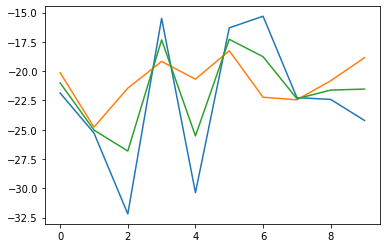

In [10]:
plt.plot(df_cer.OD_z)
plt.plot(df_cer.OS_z)
plt.plot(df_cer.cceye_z)

In [11]:
# cyclopean eye to camera pos in carteasian coordinates (pupil labs reverts y space to make it eaquil to image space)
cam_x = + 11 /1000 # left of the cc eye
cam_y = + 14 /1000 # up of eye 
cam_z = + 22 /1000 # infront of eye

cal_dist = 0.9
z_dist = [0.3, 0.5, 0.7, 1.0, 1.5,]
x_deg = range(-30, 31, 5)
y_deg = range(-20, 21, 5)

x_array_deg, y_array_deg = np.meshgrid(x_deg, y_deg)

# x, y, z array in meter [m]
x_array = np.tan(x_array_deg * np.pi /180) * cal_dist
y_array = np.tan(y_array_deg * np.pi /180) * cal_dist
z_array = np.ones(np.shape(y_array)) * cal_dist

# x, y, z in camera space 
x_array_cam = x_array - cam_x
y_array_cam = y_array - cam_y
z_array_cam = z_array - cam_z

In [12]:
def direction_of_error(row_idx, col_idx):
    v = np.array((x_array_cam[row_idx, col_idx],
                  y_array_cam[row_idx, col_idx]))
    normalized_v = v / np.sqrt(np.sum(v**2))
    return normalized_v

def angular_dif_of_vector(vector_1, vector_2):
    unit_vector_1 = vector_1 / np.linalg.norm(vector_1)
    unit_vector_2 = vector_2 / np.linalg.norm(vector_2)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    angle = np.arccos(dot_product) *180/np.pi
    return angle

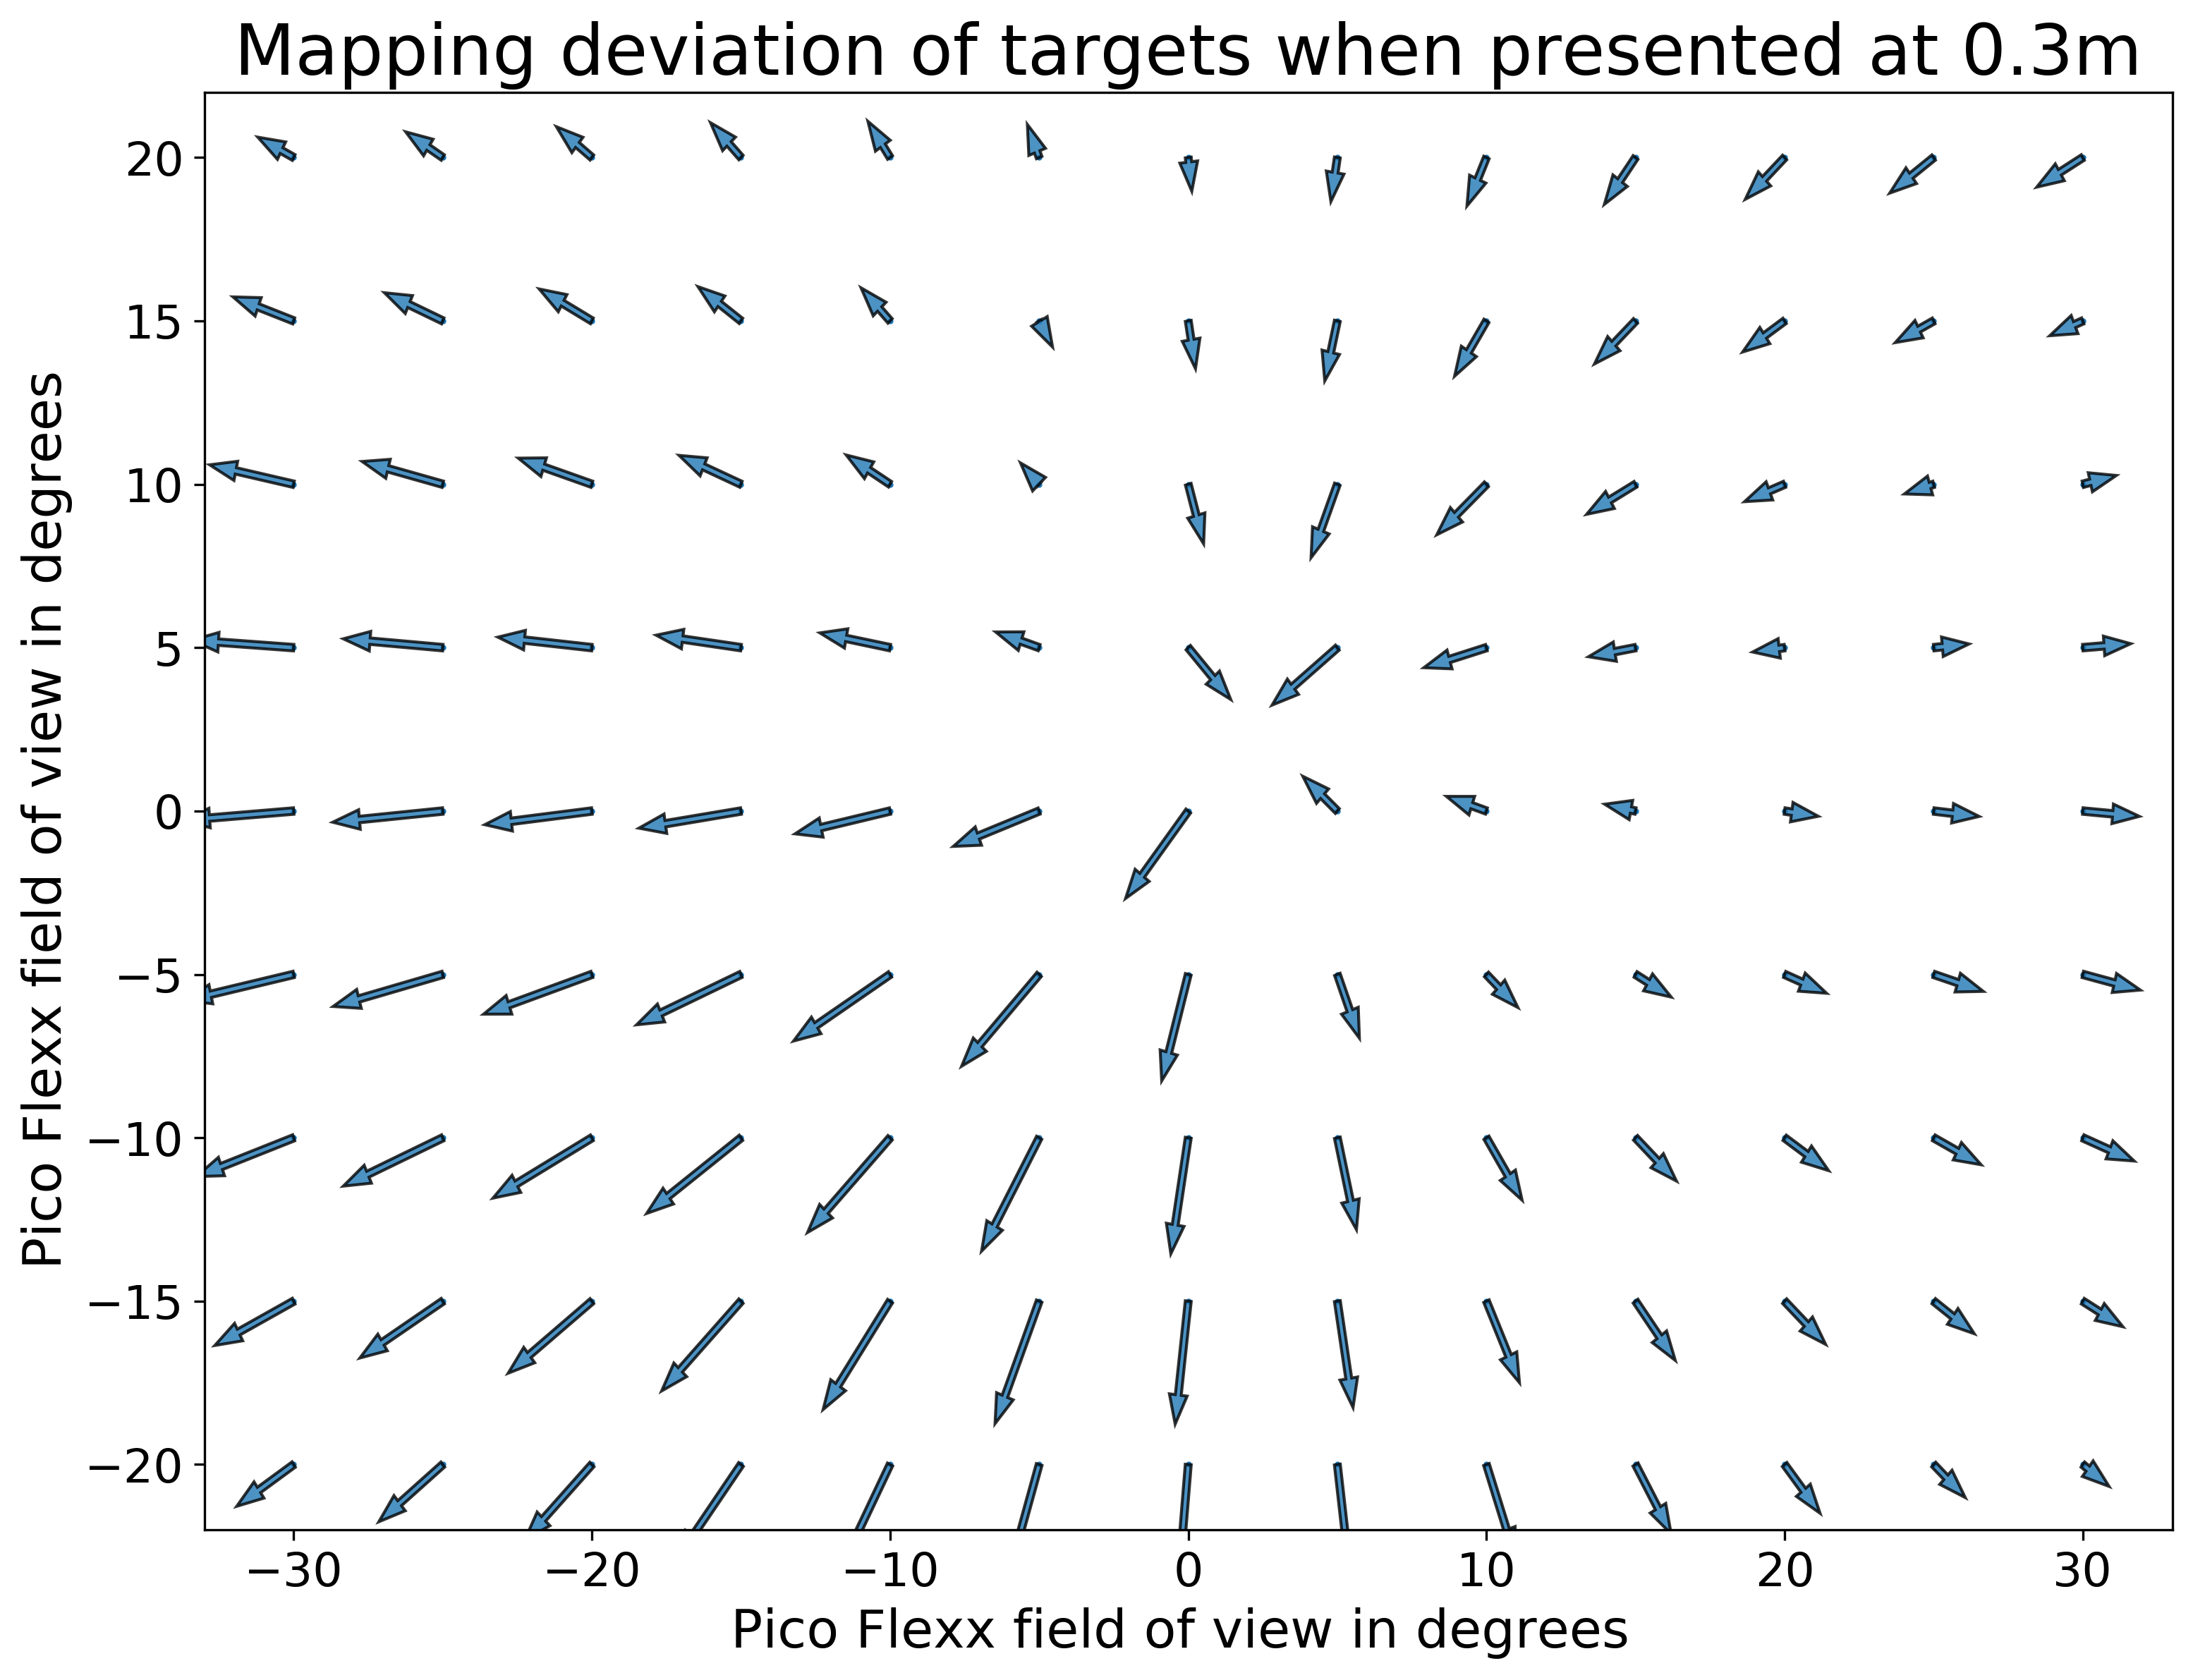

In [13]:
# calculating target position vector matrix for various distances 
target_distance = 0.3
x_array_cam = np.tan(x_array_deg * np.pi /180) * target_distance - cam_x
y_array_cam = np.tan(y_array_deg * np.pi /180) * target_distance - cam_y
z_array_cam = np.ones(np.shape(y_array))       * target_distance - cam_z

# norm vector of field of view Pico flexx passing thorough calibration centre
cam_pos_vector = np.array([+11, +14, +22,])
calib_target_center_pos = np.array([0, 0, 900,])
norm_vector_PF =  calib_target_center_pos - cam_pos_vector

new_mat = np.zeros(np.shape(x_array))

plt.figure(figsize=(12,9), dpi=300)
plt.scatter(x_array_deg, y_array_deg, s=1)
# plt.scatter(x_array_cam, y_array_cam, s=1)

for row_idx in range(0, x_array.shape[0]):
    for col_idx in range(0, x_array.shape[1]):
        # calculating angular difference of norm_vector_PF and target_vector 
        target_vector = np.array([x_array_cam[row_idx, col_idx], y_array_cam[row_idx, col_idx], z_array_cam[row_idx, col_idx]])
        cam_vector_deg = angular_dif_of_vector(target_vector, norm_vector_PF)
        # comparing to eye rotation onto same target        
        eye_vector_deg = np.sqrt(x_array_deg[row_idx, col_idx]**2 + y_array_deg[row_idx, col_idx]**2)
        
        residual_vector_deg = cam_vector_deg - eye_vector_deg  
        new_mat[row_idx, col_idx] = residual_vector_deg
        
        # draw vector of distortion onto the graph
        error_dir_mag = direction_of_error(row_idx, col_idx) * residual_vector_deg
        plt.arrow(x_array_deg[row_idx, col_idx],
                  y_array_deg[row_idx, col_idx],
                  error_dir_mag[0], error_dir_mag[1],  width = 0.2, alpha=0.8)
        plt.title(('Mapping deviation of targets when presented at '+ str(target_distance)+ 'm'),
                  fontsize=24)
        plt.xlabel('Pico Flexx field of view in degrees ', fontsize=18)
        plt.ylabel('Pico Flexx field of view in degrees ', fontsize=18)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        
    output_fp_fn = r'C:\Users\p.wagner\Documents\phd\C2 study_I_ValidationETPF\images'+ str(target_distance)+'.png'
    plt.savefig(output_fp_fn)

In [14]:
np.max(new_mat)

3.1474273207462105

In [15]:

fig = go.Figure(data=[go.Scatter3d(x=x_array_deg.flatten(), y=y_array_deg.flatten(), z=new_mat.flatten(), mode='markers')])
#     title_name = ('PX_id: ' +str(px_id) + ', Scan Nr: ' + str(scan_id) + 
#                   ', Quality: '+  str(oct_scan_data.scan_quality)) 
fig.update_layout(autosize=False,
                  width=900, height=900,
                  margin=dict(l=50, r=50, b=50, t=50))

fig.show()

In [28]:
fig = go.Figure(data=[go.Surface(x=x_array_deg, y=y_array_deg, z=new_mat)])
#     title_name = ('PX_id: ' +str(px_id) + ', Scan Nr: ' + str(scan_id) + 
#                   ', Quality: '+  str(oct_scan_data.scan_quality)) 
fig.update_layout(autosize=False,
                  width=900, height=900,
                  margin=dict(l=50, r=50, b=50, t=50))

fig.show()

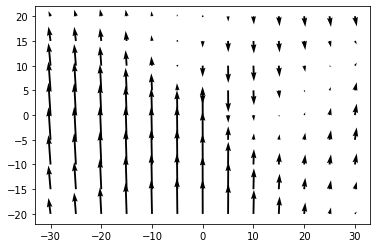

In [29]:
plt.quiver(x_array_deg, y_array_deg, x_array_cam, new_mat, )

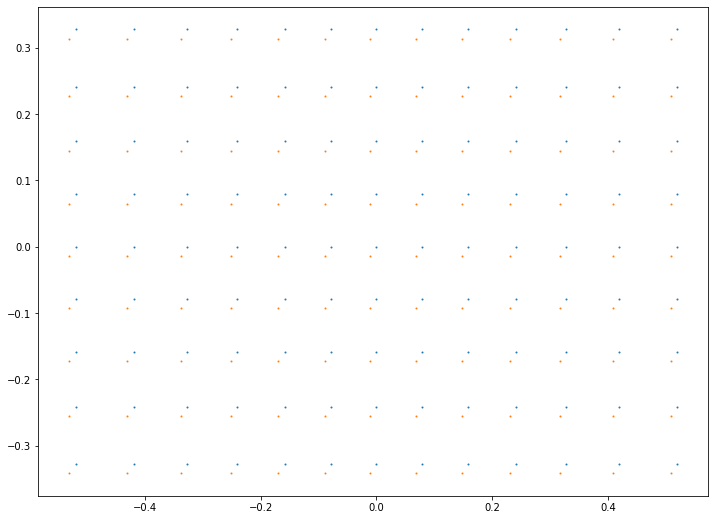

In [15]:
plt.figure(figsize=(12,9))
plt.scatter(x_array, y_array, s=1)
plt.scatter(x_array_cam, y_array_cam, s=1)
# for row_value in x_deg:
#     for col_value in y_deg:
#         plt.arrow(row_value, col_value, 2, 2,  width = 0.1, alpha=0.4)

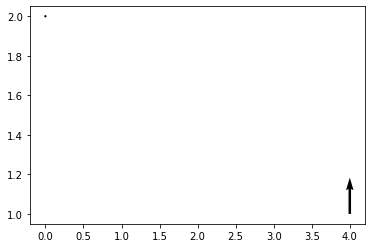

In [16]:
plt.quiver([0,4], [2,1], [5,0], [1, 200],)